<a href="https://colab.research.google.com/github/manjushabayireddy/Stock-price-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/data/TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Text(0, 0.5, 'Price ($)')

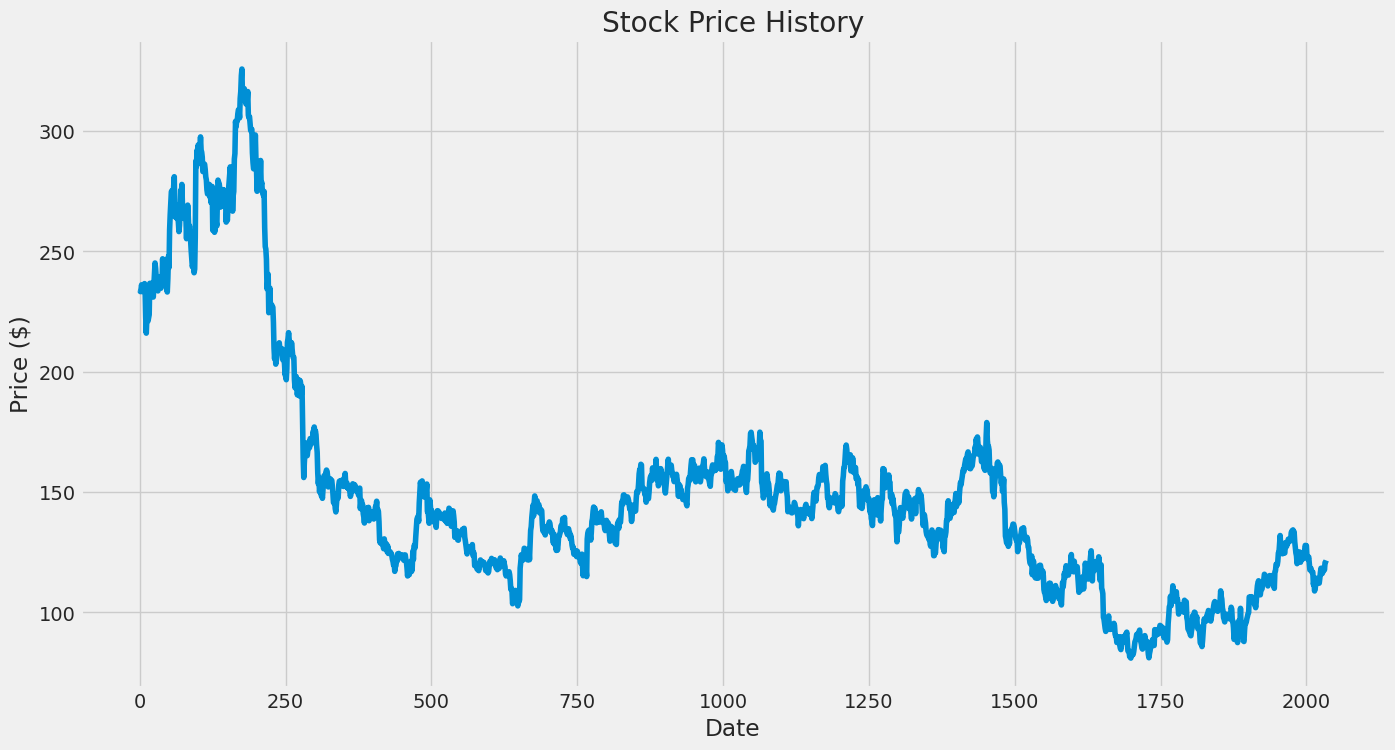

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price ($)')

<ipython-input-32-ed14e1f7346d>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(15)
<ipython-input-32-ed14e1f7346d>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(window=30).mean()['Open'].plot()


<Axes: >

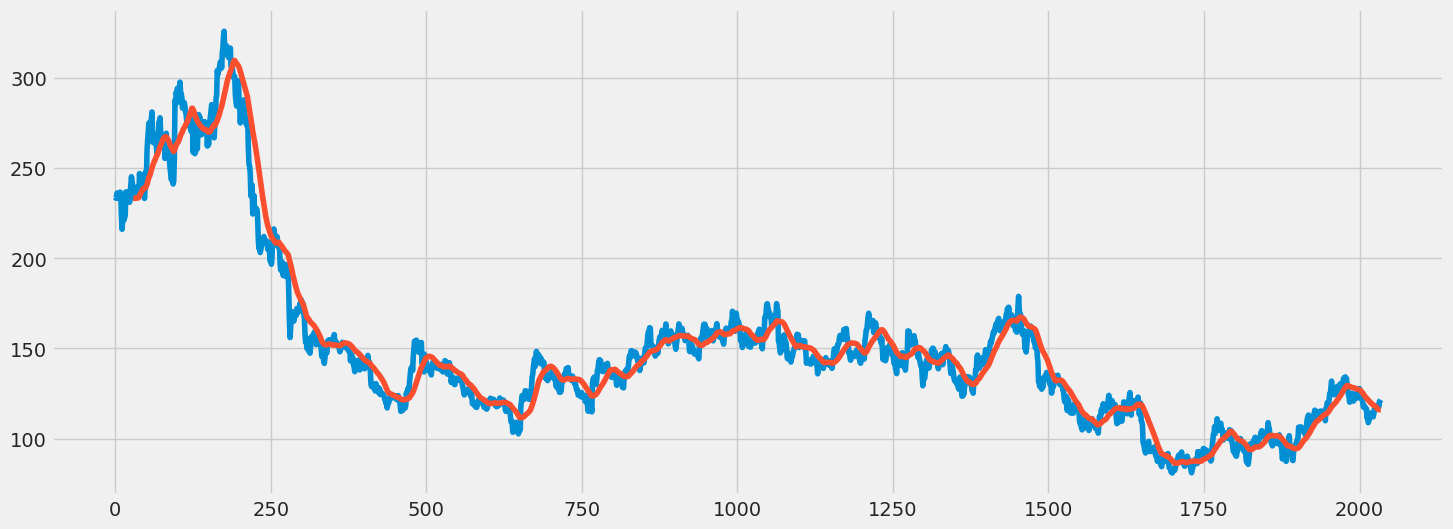

In [ ]:
#Rolling mean
df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()

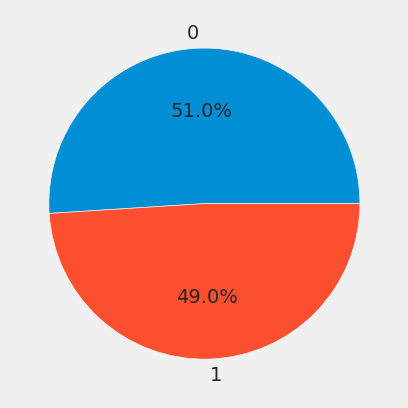

In [ ]:
#Pie chart
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [ ]:
df1 = df.reset_index()['Close']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(1526, 509)

In [ ]:
# Modelling
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.32271242, 0.3247549 , 0.32148693, ..., 0.1997549 , 0.2001634 ,
        0.20506536],
       [0.3247549 , 0.32148693, 0.32352941, ..., 0.2001634 , 0.20506536,
        0.2005719 ],
       [0.32148693, 0.32352941, 0.3255719 , ..., 0.20506536, 0.2005719 ,
        0.18831699]])

In [ ]:
x_test

array([[0.1621732 , 0.15972222, 0.16278595, ..., 0.14644608, 0.15216503,
        0.1435866 ],
       [0.15972222, 0.16278595, 0.17340686, ..., 0.15216503, 0.1435866 ,
        0.13419118],
       [0.16278595, 0.17340686, 0.14174837, ..., 0.1435866 , 0.13419118,
        0.1431781 ],
       ...,
       [0.13827614, 0.13541667, 0.13010621, ..., 0.14562908, 0.15236928,
        0.15400327],
       [0.13541667, 0.13010621, 0.12254902, ..., 0.15236928, 0.15400327,
        0.14971405],
       [0.13010621, 0.12254902, 0.12479575, ..., 0.15400327, 0.14971405,
        0.1621732 ]])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout,  Bidirectional
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_11 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
45/45 [==============================] - 15s 199ms/step - loss: 0.0125 - val_loss: 9.7366e-04
Epoch 2/50
45/45 [==============================] - 6s 134ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
45/45 [==============================] - 8s 175ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/50
45/45 [==============================] - 6s 131ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 5/50
45/45 [==============================] - 7s 162ms/step - loss: 0.0011 - val_loss: 9.0613e-04
Epoch 6/50
45/45 [==============================] - 6s 141ms/step - loss: 0.0011 - val_loss: 7.1600e-04
Epoch 7/50
45/45 [==============================] - 7s 150ms/step - loss: 9.3753e-04 - val_loss: 0.0014
Epoch 8/50
45/45 [==============================] - 7s 154ms/step - loss: 8.9579e-04 - val_loss: 7.7004e-04
Epoch 9/50
45/45 [==============================] - 7s 158ms/step - loss: 8.1132e-04 - val_loss: 7.3213e-04
Epoch 10/50
45/45 [==============================] - 7s 153ms/step 

In [ ]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)

45/45 [==============================] - 2s 34ms/step


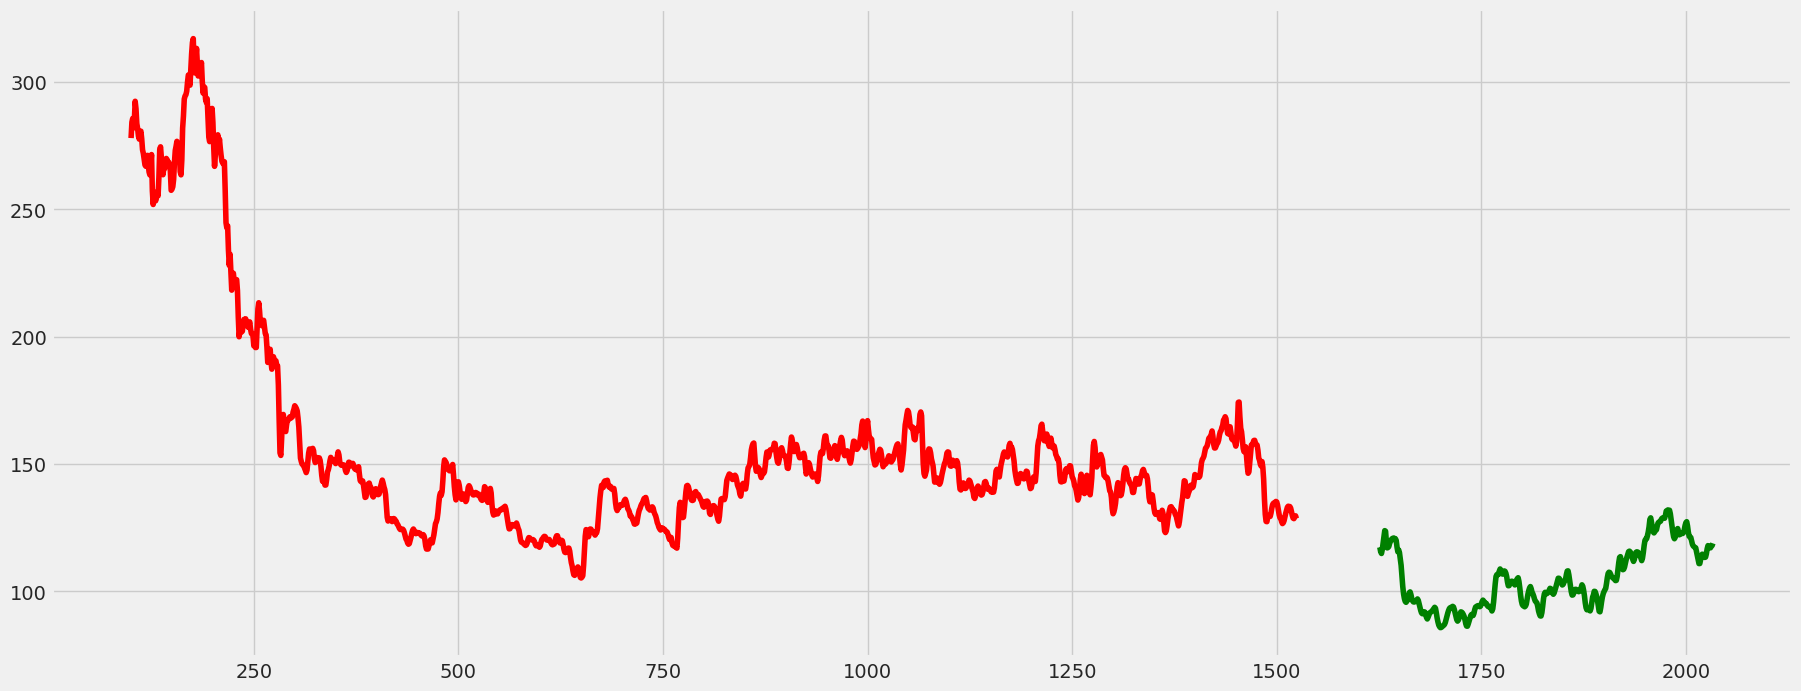

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict
# Test predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict
plt.subplots(figsize=(20,8))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

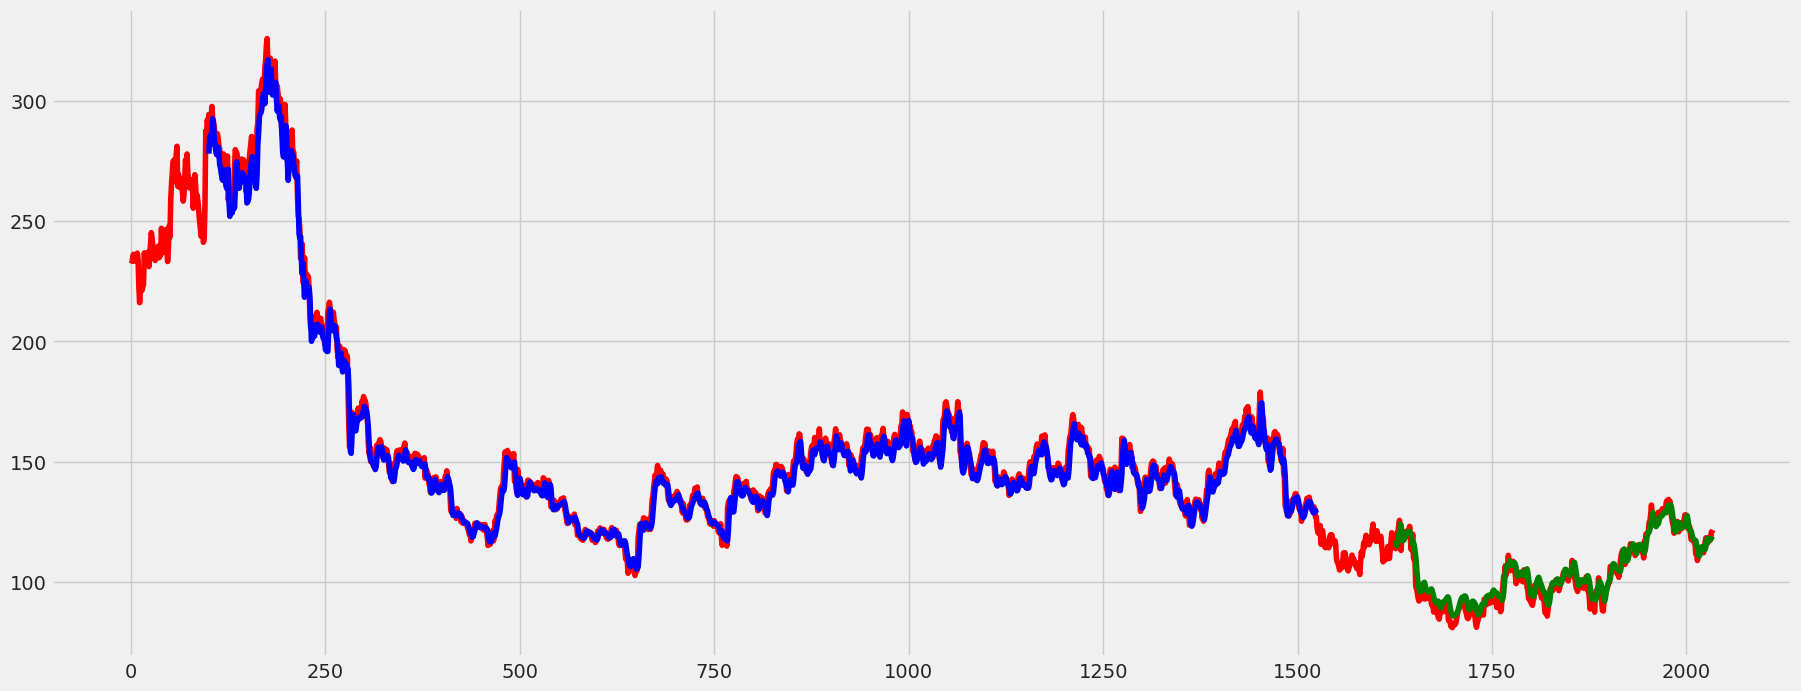

In [ ]:
# Baseline and predictions
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'red')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'green')
plt.show()


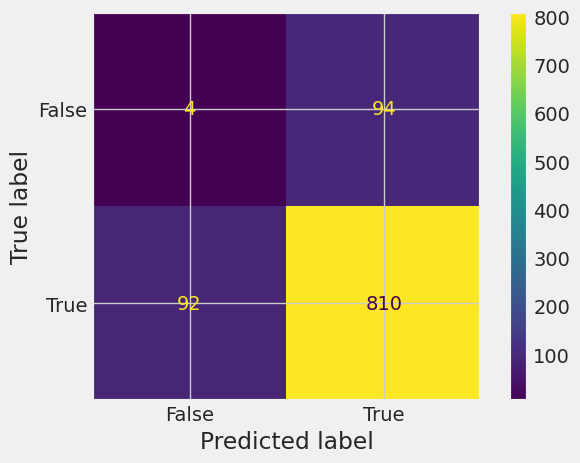

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()